In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from statsmodels.tsa.stattools import adfuller

In [2]:
spy = yf.Ticker('SPY')
spy_price_data = spy.history(period='max')['Close']
spy_price_data.index = spy_price_data.index.tz_localize(None)
spy_price_data = spy_price_data.reset_index()

spy_price_data

,Date,Close
0,1993-01-29,24.684103
1,1993-02-01,24.859667
2,1993-02-02,24.912338
3,1993-02-03,25.175688
4,1993-02-04,25.281006
...,...,...
7910,2024-07-01,545.340027
7911,2024-07-02,549.010010
7912,2024-07-03,551.460022
7913,2024-07-05,554.640015


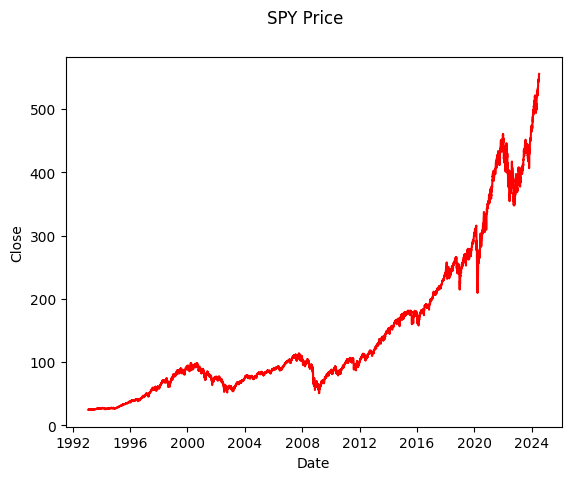

In [3]:
sns.lineplot(data=spy.history(period='max'), x='Date', y='Close', color = 'red')
plt.suptitle('SPY Price')
plt.show()

## Strategy
To evaluate if there is any statistical correlation in performance per day of the week:

Null Hypothesis: There is no relationship between market returns and the day of the week. 
Alternate Hypothesis: Some days are better trading days than others. 

Based on p-value and by looking at chart, it's clear there is no statistical significance in the mean between the day groups.

In [4]:
spy_price_data['chg_pct'] = spy_price_data['Close'].pct_change() * 100
spy_price_data['day'] = spy_price_data['Date'].dt.day_name()
spy_price_data = spy_price_data.dropna()
spy_price_data

,Date,Close,chg_pct,day
1,1993-02-01,24.859667,0.711242,Monday
2,1993-02-02,24.912338,0.211875,Tuesday
3,1993-02-03,25.175688,1.057105,Wednesday
4,1993-02-04,25.281006,0.418332,Thursday
5,1993-02-05,25.263454,-0.069425,Friday
...,...,...,...,...
7910,2024-07-01,545.340027,0.205809,Monday
7911,2024-07-02,549.010010,0.672971,Tuesday
7912,2024-07-03,551.460022,0.446260,Wednesday
7913,2024-07-05,554.640015,0.576650,Friday


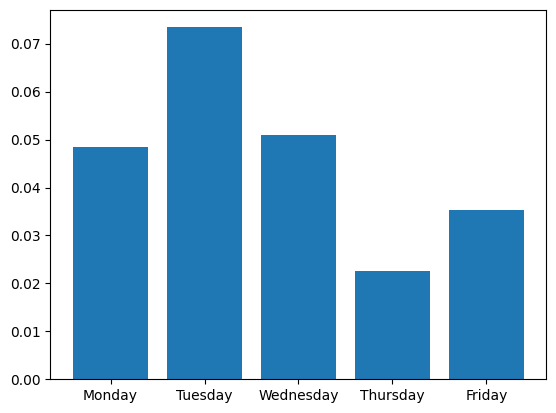

In [5]:
avg_return_per_day = {
    'Monday' : spy_price_data.loc[spy_price_data['day'] == 'Monday', 'chg_pct'].mean(),
    'Tuesday' : spy_price_data.loc[spy_price_data['day'] == 'Tuesday', 'chg_pct'].mean(),
    'Wednesday' : spy_price_data.loc[spy_price_data['day'] == 'Wednesday', 'chg_pct'].mean(),
    'Thursday' : spy_price_data.loc[spy_price_data['day'] == 'Thursday', 'chg_pct'].mean(),
    'Friday' : spy_price_data.loc[spy_price_data['day'] == 'Friday', 'chg_pct'].mean()
}

days = list(avg_return_per_day.keys())
values = list(avg_return_per_day.values())
plt.bar(range(len(avg_return_per_day)), values, tick_label = days)
plt.show()

1.705463112336459


/var/folders/nf/pgqkpvdj1l9cmj9rldvv2f6c0000gn/T/ipykernel_15669/2369967774.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( spy_price_data['chg_pct'] )


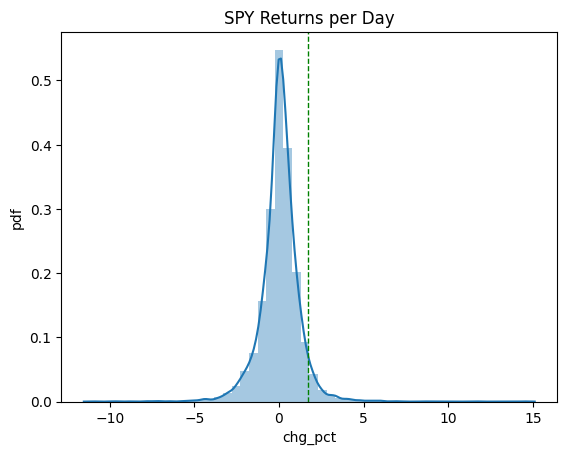

p-value of returns by day is 0.7936634538162383 which is > than our desired p of .05.


In [6]:
import pingouin as pg

# Test for statistical significance with ANOVA (difference between group means)

# For the means to be statistically different, the group's mean must lie in the 95th percentile of the distribution (assuming p = .05)

threshold = np.quantile(spy_price_data['chg_pct'], .95)
print(threshold)
plt.title( 'SPY Returns per Day' )  
plt.ylabel( 'pdf' )  
sns.distplot( spy_price_data['chg_pct'] )  
plt.axvline(x= threshold, linewidth=1, color='green', ls='--')
plt.show()  

results_day = pg.anova(data = spy_price_data, dv = 'chg_pct', between = 'day')
print('p-value of returns by day is {} which is > than our desired p of .05.'.format(results_day.loc[results_day.index[0],'p-unc']))

p-value of returns by month is 0.5257122510719849 which is > than our desired p of .05.


/var/folders/nf/pgqkpvdj1l9cmj9rldvv2f6c0000gn/T/ipykernel_15669/3885062198.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spy_price_data['month'] = spy_price_data['Date'].dt.month_name()


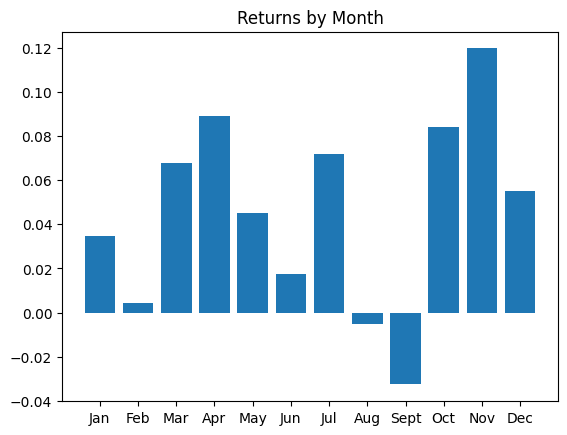

In [7]:
spy_price_data['month'] = spy_price_data['Date'].dt.month_name()
results_month = pg.anova(data = spy_price_data, dv = 'chg_pct', between = 'month')
print('p-value of returns by month is {} which is > than our desired p of .05.'.format(results_month.loc[results_month.index[0],'p-unc']))

avg_return_per_month = {
    'Jan' : spy_price_data.loc[spy_price_data['month'] == 'January', 'chg_pct'].mean(),
    'Feb' : spy_price_data.loc[spy_price_data['month'] == 'February', 'chg_pct'].mean(),
    'Mar' : spy_price_data.loc[spy_price_data['month'] == 'March', 'chg_pct'].mean(),
    'Apr' : spy_price_data.loc[spy_price_data['month'] == 'April', 'chg_pct'].mean(),
    'May' : spy_price_data.loc[spy_price_data['month'] == 'May', 'chg_pct'].mean(),
    'Jun' : spy_price_data.loc[spy_price_data['month'] == 'June', 'chg_pct'].mean(),
    'Jul' : spy_price_data.loc[spy_price_data['month'] == 'July', 'chg_pct'].mean(),
    'Aug' : spy_price_data.loc[spy_price_data['month'] == 'August', 'chg_pct'].mean(),
    'Sept' : spy_price_data.loc[spy_price_data['month'] == 'September', 'chg_pct'].mean(),
    'Oct' : spy_price_data.loc[spy_price_data['month'] == 'October', 'chg_pct'].mean(),
    'Nov' : spy_price_data.loc[spy_price_data['month'] == 'November', 'chg_pct'].mean(),
    'Dec' : spy_price_data.loc[spy_price_data['month'] == 'December', 'chg_pct'].mean()
}

months = list(avg_return_per_month.keys())
values = list(avg_return_per_month.values())
plt.bar(range(len(avg_return_per_month)), values, tick_label = months)
plt.title('Returns by Month')
plt.show()

/var/folders/nf/pgqkpvdj1l9cmj9rldvv2f6c0000gn/T/ipykernel_15669/759279441.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spy_price_data['quarter'] = spy_price_data['Date'].dt.quarter


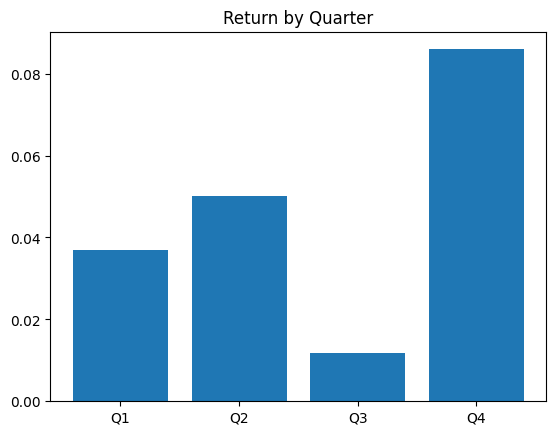

p-value of returns by quarter is 0.2518359520296913 which is > than our desired p of .05.


In [8]:
spy_price_data['quarter'] = spy_price_data['Date'].dt.quarter

avg_return_per_quarter = {
    'Q1' : spy_price_data.loc[spy_price_data['quarter'] == 1, 'chg_pct'].mean(),
    'Q2' : spy_price_data.loc[spy_price_data['quarter'] == 2, 'chg_pct'].mean(),
    'Q3' : spy_price_data.loc[spy_price_data['quarter'] == 3, 'chg_pct'].mean(),
    'Q4' : spy_price_data.loc[spy_price_data['quarter'] == 4, 'chg_pct'].mean()
}

quarters = list(avg_return_per_quarter.keys())
values = list(avg_return_per_quarter.values())
plt.bar(range(len(avg_return_per_quarter)), values, tick_label = quarters)
plt.title('Return by Quarter')
plt.show()

results_quarter = pg.anova(data = spy_price_data, dv = 'chg_pct', between = 'quarter')
print('p-value of returns by quarter is {} which is > than our desired p of .05.'.format(results_quarter.loc[results_quarter.index[0],'p-unc']))

p-value of returns by DAY is 0.7936634538162383 which is > than our desired p of .05.
p-value of returns by MONTH is 0.5257122510719849 which is > than our desired p of .05.
p-value of returns by QUARTER is 0.2518359520296913 which is > than our desired p of .05.


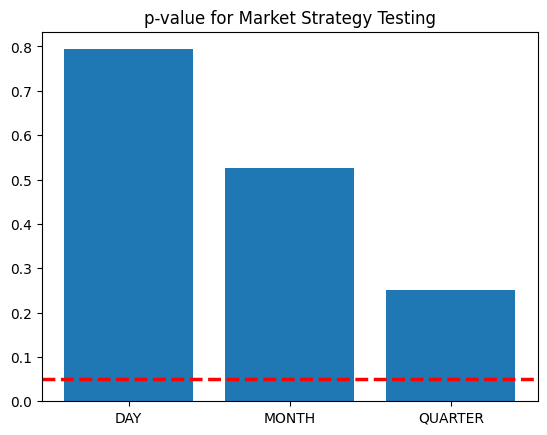

In [9]:
print('p-value of returns by DAY is {} which is > than our desired p of .05.'.format(results_day.loc[results_day.index[0],'p-unc']))
print('p-value of returns by MONTH is {} which is > than our desired p of .05.'.format(results_month.loc[results_month.index[0],'p-unc']))
print('p-value of returns by QUARTER is {} which is > than our desired p of .05.'.format(results_quarter.loc[results_quarter.index[0],'p-unc']))

p_test_dict = {
    'DAY' : results_day.loc[results_day.index[0],'p-unc'],
    'MONTH' : results_month.loc[results_month.index[0],'p-unc'],
    'QUARTER' : results_quarter.loc[results_quarter.index[0],'p-unc'],
}

keys = list(p_test_dict.keys())
values = list(p_test_dict.values())
plt.bar(range(len(p_test_dict)), values, tick_label = keys)
plt.title('p-value for Market Strategy Testing')
plt.axhline(y= .05, linewidth=2.5, color='red', ls='--')
plt.show()

In [10]:
p_threshold = .05

def getTickerDF(ticker):
    # Build df from ticker with yahoo finance API
    df = yf.Ticker(ticker)
    df = df.history(period='max')['Close']
    df.index = df.index.tz_localize(None)
    df = df.reset_index()
    df['chg_pct'] = df['Close'].pct_change() * 100
    df['day'] = df['Date'].dt.day_name()
    df['month'] = df['Date'].dt.month_name()
    df['quarter'] = df['Date'].dt.quarter

    return df

def runScreening(ticker):
    ### Take a ticker and return if there is statistical significance in any of the testable strategies

    df = getTickerDF(ticker)
    # Statistical significance starts out as False, as most will be False
    stat_sig = False

    results_day = pg.anova(data = df, dv = 'chg_pct', between = 'day')
    results_month = pg.anova(data = df, dv = 'chg_pct', between = 'month')
    results_quarter = pg.anova(data = df, dv = 'chg_pct', between = 'quarter')
        
    p_test_dict = {
        'DAY' : results_day.loc[results_day.index[0],'p-unc'],
        'MONTH' : results_month.loc[results_month.index[0],'p-unc'],
        'QUARTER' : results_quarter.loc[results_quarter.index[0],'p-unc'],
    }

    # Check if any values in p_val dict are less than .05 
    stat_sig_dict = {k:v for (k,v) in p_test_dict.items() if v < p_threshold}
    if len(stat_sig_dict) > 0:
        print('STATISTICAL SIGNIFICANCE IDENTIFIED : {}'.format(stat_sig_dict.keys()))
        stat_sig = True

    return (ticker, stat_sig, stat_sig_dict, p_test_dict)

def graphResults(ticker, p_test_dict):

    keys = list(p_test_dict.keys())
    values = list(p_test_dict.values())
    plt.bar(range(len(p_test_dict)), values, tick_label = keys)
    plt.title('p-value for {} Strategy Testing'.format(ticker))
    plt.axhline(y= .05, linewidth=2.5, color='red', ls='--')
    plt.show()

STATISTICAL SIGNIFICANCE IDENTIFIED : dict_keys(['MONTH'])
STATISTICAL SIGNIFICANCE IDENTIFIED : dict_keys(['DAY', 'MONTH'])
STATISTICAL SIGNIFICANCE IDENTIFIED : dict_keys(['DAY'])
STATISTICAL SIGNIFICANCE IDENTIFIED : dict_keys(['MONTH', 'QUARTER'])
STATISTICAL SIGNIFICANCE IDENTIFIED : dict_keys(['MONTH'])
[('GOOG', True, {'MONTH': 0.03866616203312748}, {'DAY': 0.5623997304461739, 'MONTH': 0.03866616203312748, 'QUARTER': 0.2649550979452684}), ('GS', False, {}, {'DAY': 0.850573414563689, 'MONTH': 0.6680346912570944, 'QUARTER': 0.2621887707409967}), ('MSFT', False, {}, {'DAY': 0.061584061392189395, 'MONTH': 0.19975543555292063, 'QUARTER': 0.20902757604538602}), ('AAPL', True, {'DAY': 0.015661626059795486, 'MONTH': 0.00629566843145749}, {'DAY': 0.015661626059795486, 'MONTH': 0.00629566843145749, 'QUARTER': 0.3635279199559398}), ('AMZN', False, {}, {'DAY': 0.7928184769910281, 'MONTH': 0.5656005141421389, 'QUARTER': 0.9576853313495904}), ('TSLA', True, {'DAY': 0.010377615867444097}, {'DA

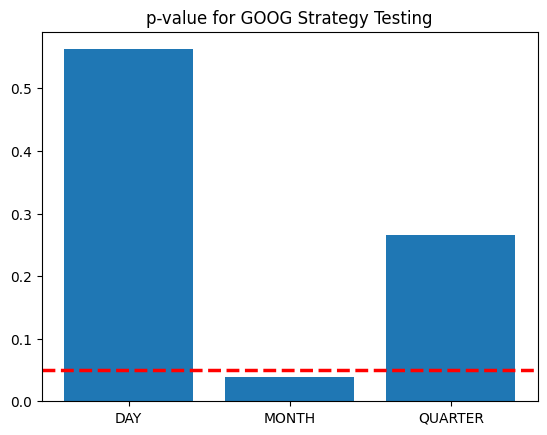

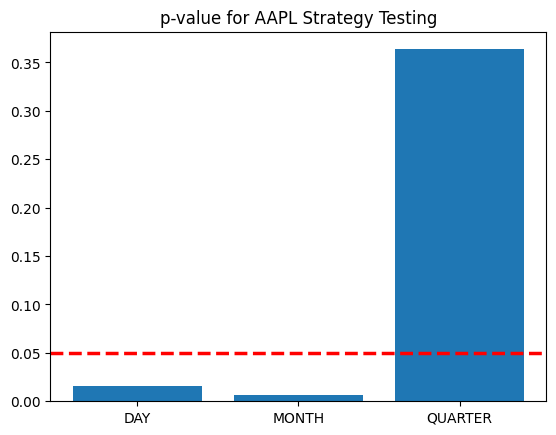

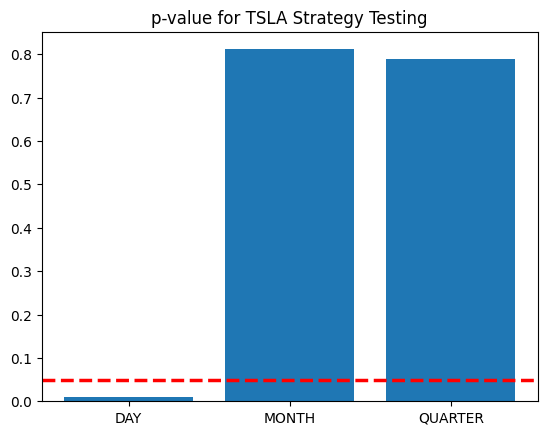

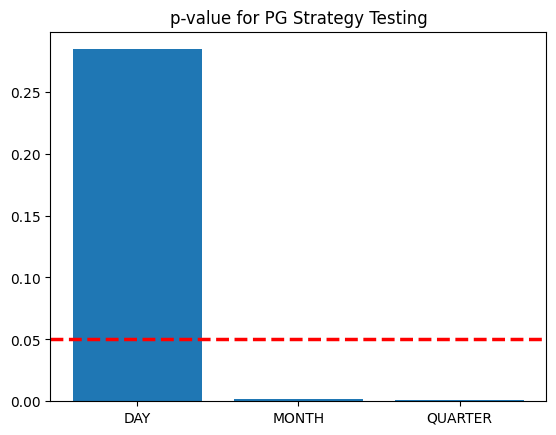

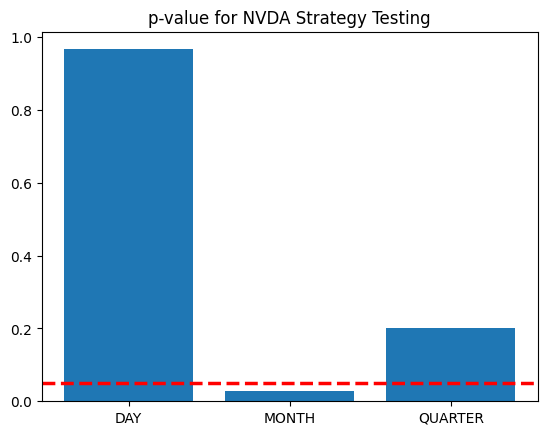

5/11 total analyzed tickers exhibited statistical significance in AT LEAST 1 of strategies.


In [11]:
import re

# import NASDAQ tickers
filepath = '/Users/jacobcassidy/Desktop/Coding Projects/Trading Studies/quanttrading/nasdaq_tickers.csv'

nasdaq = pd.read_csv(filepath, header=0)
nasdaq_tickers = nasdaq[['Symbol', 'Name']]
nasdaq_tickers = nasdaq_tickers.dropna()
i = 0
ticker_dict = {}

# replace 100 with len(nasdaq_tickers) when ready for all tickers
# while i < 100:
#     ticker_dict[nasdaq_tickers.iloc[i, 0]] = nasdaq_tickers.iloc[i, 1]
#     i += 1

ticker_dict = {
    'GOOG' : 'Google',
    'GS' : 'Goldman Sachs',
    'MSFT' : 'Microsoft',
    'AAPL' : 'Apple',
    'AMZN' : 'Amazon',
    'TSLA' : 'Tesla',
    'ENPH' : 'Enphase',
    'PG' : 'Proctor and Gamble',
    'DKNG' : 'Draftkings',
    'PLTR' : 'Palantir',
    'NVDA' : 'Nvidia'
}

results = []
for ticker in ticker_dict:
    try:
        results.append(runScreening(ticker))
    except AttributeError:
        continue

print(results)

# Graph each ticker, add tickers with statistical significance to new dict
ticker_dict_stat_sig = {}
total_count = 0
sig_count = 0
for ticker in results:
    if ticker[1] == True:
        graphResults(ticker[0], ticker[3])
        sig_count += 1
        ticker_dict_stat_sig[ticker[0]] = ticker[2].keys()
    total_count += 1

print("{}/{} total analyzed tickers exhibited statistical significance in AT LEAST 1 of strategies.".format(sig_count, total_count))

{'GOOG': dict_keys(['MONTH']), 'AAPL': dict_keys(['DAY', 'MONTH']), 'TSLA': dict_keys(['DAY']), 'PG': dict_keys(['MONTH', 'QUARTER']), 'NVDA': dict_keys(['MONTH'])}


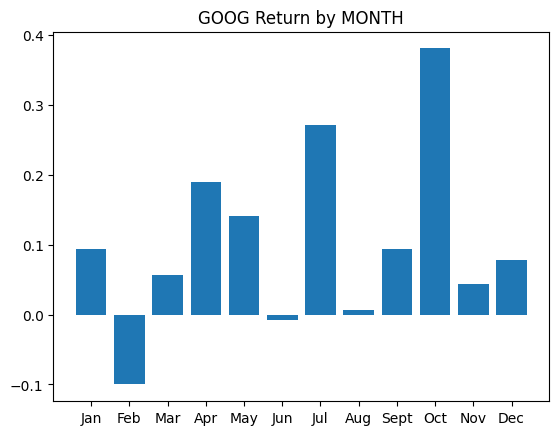

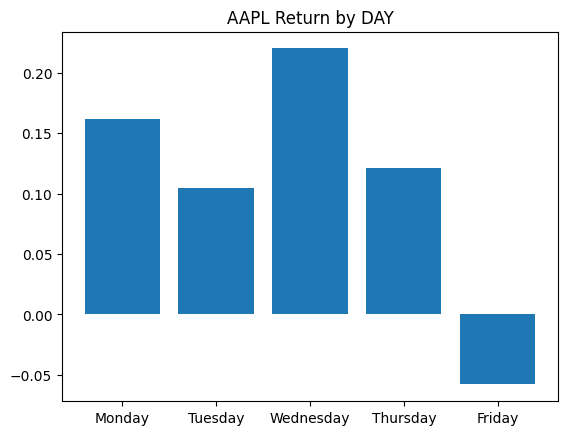

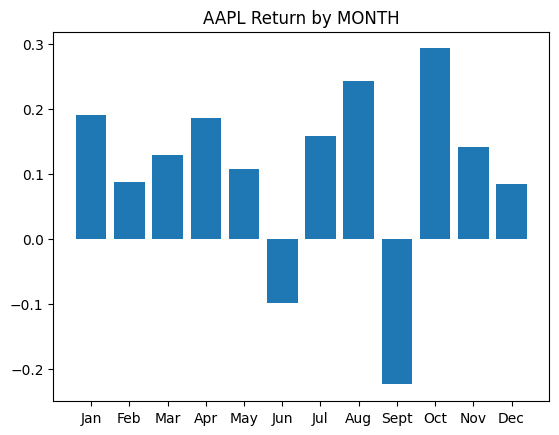

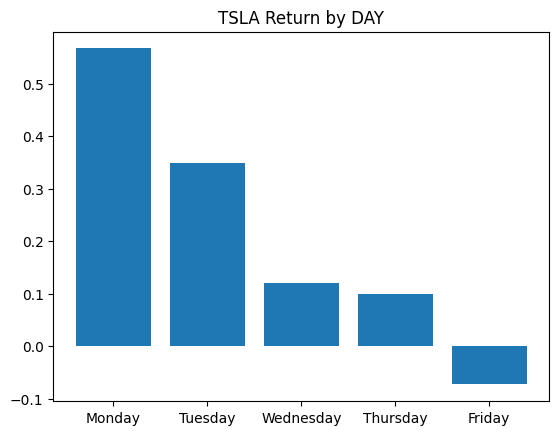

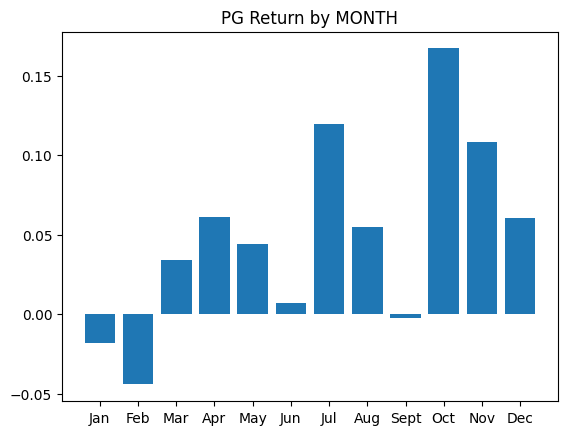

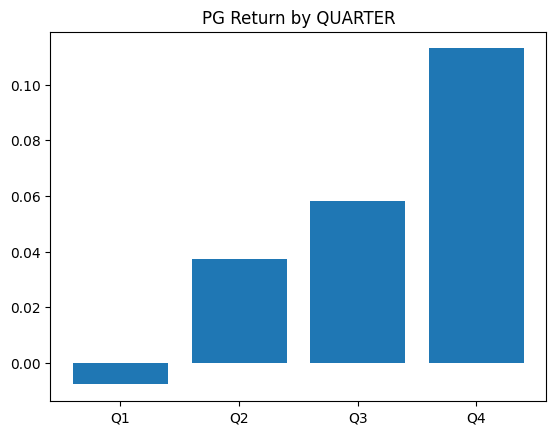

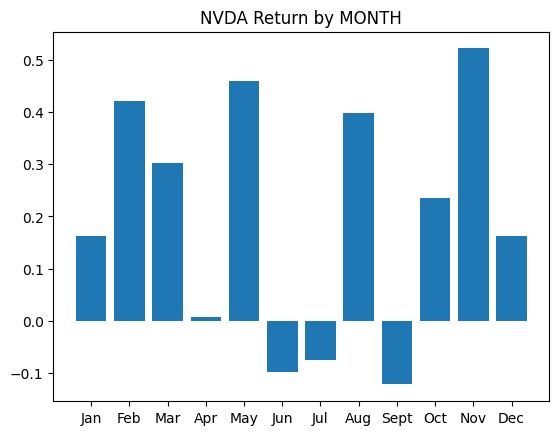

In [12]:
def viewResults(ticker, strategy_list):
    df = getTickerDF(ticker)

    # In the case there are multiple statistically significant strategies for 1 ticker
    for strategy in strategy_list:

        if strategy == 'QUARTER':
            avg = {
            'Q1' : df.loc[df['quarter'] == 1, 'chg_pct'].mean(),
            'Q2' : df.loc[df['quarter'] == 2, 'chg_pct'].mean(),
            'Q3' : df.loc[df['quarter'] == 3, 'chg_pct'].mean(),
            'Q4' : df.loc[df['quarter'] == 4, 'chg_pct'].mean()
            }
        
        if strategy == 'MONTH': 
            avg = {
            'Jan' : df.loc[df['month'] == 'January', 'chg_pct'].mean(),
            'Feb' : df.loc[df['month'] == 'February', 'chg_pct'].mean(),
            'Mar' : df.loc[df['month'] == 'March', 'chg_pct'].mean(),
            'Apr' : df.loc[df['month'] == 'April', 'chg_pct'].mean(),
            'May' : df.loc[df['month'] == 'May', 'chg_pct'].mean(),
            'Jun' : df.loc[df['month'] == 'June', 'chg_pct'].mean(),
            'Jul' : df.loc[df['month'] == 'July', 'chg_pct'].mean(),
            'Aug' : df.loc[df['month'] == 'August', 'chg_pct'].mean(),
            'Sept' :df.loc[df['month'] == 'September', 'chg_pct'].mean(),
            'Oct' : df.loc[df['month'] == 'October', 'chg_pct'].mean(),
            'Nov' : df.loc[df['month'] == 'November', 'chg_pct'].mean(),
            'Dec' : df.loc[df['month'] == 'December', 'chg_pct'].mean()
            }

        if strategy == 'DAY':
            avg = {
                'Monday' : df.loc[df['day'] == 'Monday', 'chg_pct'].mean(),
                'Tuesday' :df.loc[df['day'] == 'Tuesday', 'chg_pct'].mean(),
                'Wednesday': df.loc[df['day'] == 'Wednesday', 'chg_pct'].mean(),
                'Thursday': df.loc[df['day'] == 'Thursday', 'chg_pct'].mean(),
                'Friday' : df.loc[df['day'] == 'Friday', 'chg_pct'].mean()
            }

        labels = list(avg.keys())
        values = list(avg.values())
        plt.bar(range(len(avg)), values, tick_label = labels)
        plt.title('{} Return by {}'.format(ticker, strategy))
        plt.show()

print(ticker_dict_stat_sig)
for ticker in ticker_dict_stat_sig.keys():
    viewResults(ticker, ticker_dict_stat_sig[ticker])